<a href="https://colab.research.google.com/github/haribharadwaj/notebooks/blob/main/BME511/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression model (using L2 and L1 norm regularization) for heart failure data


Here we will use the dataset from:

Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5


The dataset consists of medical records from 299 patients suffering from heart failure. The measurements are from the follow-up period. Some patients survived, and others did not. Here, the goal is to test whether any of the measurements during follow-up can predict survival/fatality.

The data table, provided as a ```.csv``` file, contains the following measurements:

| Feature	| Description	| Measurement Units	| Range |
| :----     | :---          | :---              | :---: |
| Age 	| Age of the patient |	Years	| [40,..., 95] |
|Anaemia |	Decrease of red blood cells or hemoglobin |	Boolean |	0, 1 |
| High blood pressure	| If a patient has hypertension	| Boolean	| 0, 1|
|Creatinine phosphokinase (CPK) |	Level of the CPK enzyme in the blood	| mcg/L	| [23,..., 7861]|
| Diabetes	| If the patient has a prior diabetes diagnosis |	Boolean |	0, 1 |
| Ejection fraction |	Fraction of blood volume leaving the cardiac chambers for each contraction	| Percentage | 	[14,..., 80]|
|Sex	| Biological Sex	| Binary |	0 (Female), 1 (Male) |
| Platelets	| Platelet count in blood	| kiloplatelets/mL	|[25.01,..., 850.00]|
| Serum creatinine | Level of creatinine in the blood |	mg/dL	| [0.50,..., 9.40] |
| Serum sodium |	Level of sodium in the blood |	mEq/L	| [114,..., 148] |
| Smoking |	Patient had smoking history |	Boolean |	0, 1 |
| Time	| Follow-up period	| Days	| [4,...,285] |
|(target) Death Event |	If the patient died during the follow-up period |	Boolean	| 0, 1 |


In [1]:
import numpy as np
import pylab as pl

# Setting it so figs will be a bit bigger
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [5, 3.33]
plt.rcParams['figure.dpi']  = 120

## Use ```pandas``` for dealing with tabular data and CSV files

In [2]:
import pandas as pd

In [3]:
dat = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [4]:
dat.keys()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
dat.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Again, we will rely on the ```scikit-learn``` library for creating and fitting models

The ```sklearn``` library is a mature, well-tested library of implementations of many standard machine-learning models and provides a clean API to work with. In addition to being able to fit models and draw predictions for new inputs, ```sklearn``` also provides many useful utilities for handling data. It also has functions for creating toy datasets which can be used to understand the pros and cons of various models.  The library is designed to work in conjunction with ```numpy```, ```scipy```, ```matplotlib```, and ```pandas```.

In [6]:
from sklearn import linear_model

### Preprocessing
Note that the categorical variables here, like ```anaemia```, ```diabetes```, ```high_blood_pressure```, ```smoking```, etc., are already specified with one-hot encoding and they are all binary. If you had categorical variables that had other category descriptors, or if there were more than 2 categories, explicit one-hot encoding using something like ```sklearn.preprocessing.OneHotEncoder``` will be necessary as a pre-processing step.

However, the different variables have wildly different numerical ranges. So we'll scale all variable to occupy [0, 1]. This will allow for the coefficients to be interpreted more easily.

In [7]:
X = dat.drop(labels=['DEATH_EVENT','time'], axis=1, inplace=False)
y = dat['DEATH_EVENT']

In [8]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Perform regularized logistic regression model

As we discussed in class, logistic regression transforms an intermediate linear-model output to a [0, 1] output that can be interpreted as a probability of an input belonging to a certain class. The transformation is done via a logistic function of the form 
$$ f(z) = \frac{1}{1 + e^{-z}} $$
The label returned for an input by this logistic regression model is just the class that has theh highest probability for that input.

These models are fit with a cross-entropy loss function, and can be regularized using:
- L1 norm priors, leading to sparser solutions (known as **Lasso** regression)
- L2 norm priors, leading to smoother solutions (known as **ridge** regression)
- Some linear combination of L1- and L2-norm priors imposing desirable properties from both (known as **ElasticNet** regression)

### Fit L1-norm regularized logistic regression model

In [9]:
C = 1  # This is the regularization hyperparameter (inverse of how strongly you want to regularize)
# Try various C values (closer to 0 => stronger regularization; larger values => tending to max-likelihood)
model = linear_model.LogisticRegression(penalty='l1', solver='liblinear', C=C)
model.fit(X_scaled, y)
y_predicted = model.predict(X_scaled)
acc = (y_predicted == y).sum()  * 100 / y.shape[0]
print(f'Accuracy = {acc:0.1f}%')

Accuracy = 75.6%


Text(0.5, 0, 'Coefficients')

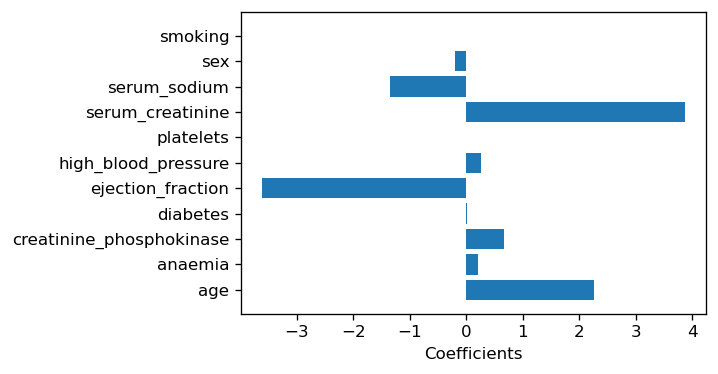

In [10]:
pl.barh(np.arange(X.shape[1]), model.coef_.squeeze())
pl.yticks(np.arange(X.shape[1]), labels=X.columns)
pl.xlabel('Coefficients')

### Fit L2-norm regularized logistic regression model

In [11]:
model = linear_model.LogisticRegression(penalty='l2', solver='liblinear', C=1)
model.fit(X_scaled, y)
y_predicted = model.predict(X_scaled)
acc = (y_predicted == y).sum()  * 100 / y.shape[0]
print(f'Accuracy = {acc:0.1f}%')

Accuracy = 74.9%


Text(0.5, 0, 'Coefficients')

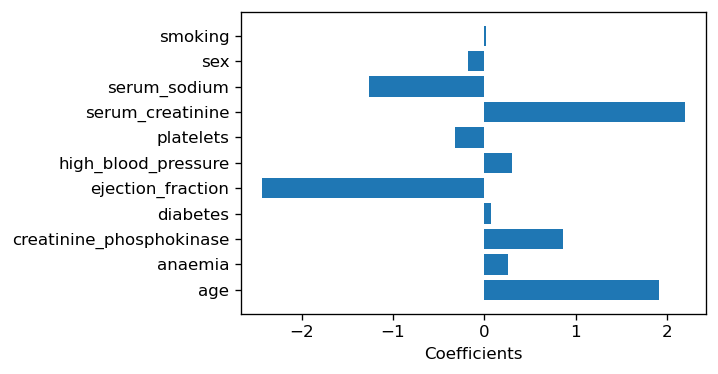

In [12]:
pl.barh(np.arange(X.shape[1]), model.coef_.squeeze())
pl.yticks(np.arange(X.shape[1]), labels=X.columns)
pl.xlabel('Coefficients')

## Conclusions about heart failure data

Reasonable classification accuracy can be obtained using the measured features. Results suggest that high serum creatinitine levels, and low ejection fraction are the strongest prdictors of fatality. Advanced age is also a risk factor.